In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import json 
from folium import plugins
import seaborn as sns
%matplotlib inline
import datetime as dt

In [3]:
df = pd.read_csv('D:\DataSci\Resources\Historical_Wildfires.csv')
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [7]:
#from js import fetch
#import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
import requests
import io
resp = requests.get(URL)
text = io.StringIO(resp.text)
    
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [8]:
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [9]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [10]:
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


<Axes: title={'center': 'Avg Estimated Fire Area'}, xlabel='Year'>

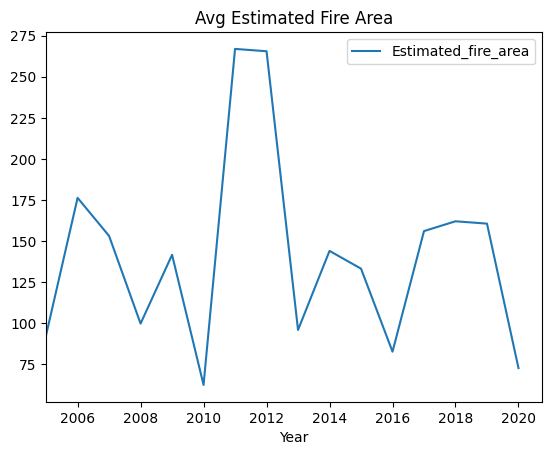

In [19]:
df_q1 = df.groupby('Year')['Estimated_fire_area'].mean().reset_index()
df_q1.head(5)
df_q1.plot(x='Year', y='Estimated_fire_area', title='Avg Estimated Fire Area', xlim=2005)


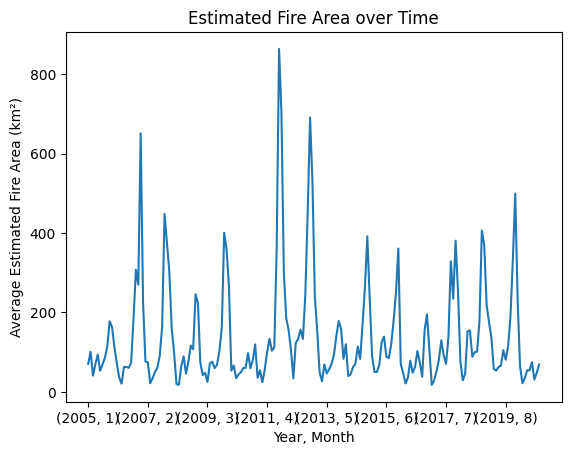

In [27]:
 df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    # Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

plt.show()

In [28]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [29]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [30]:
df_q3 = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()
df_q3

,Region,Mean_estimated_fire_brightness
0,NSW,315.526218
1,NT,322.898453
2,QL,318.364434
3,SA,321.497609
4,TA,313.368483
5,VI,315.029792
6,WA,324.142246


<Axes: xlabel='Region', ylabel='Mean_estimated_fire_brightness'>

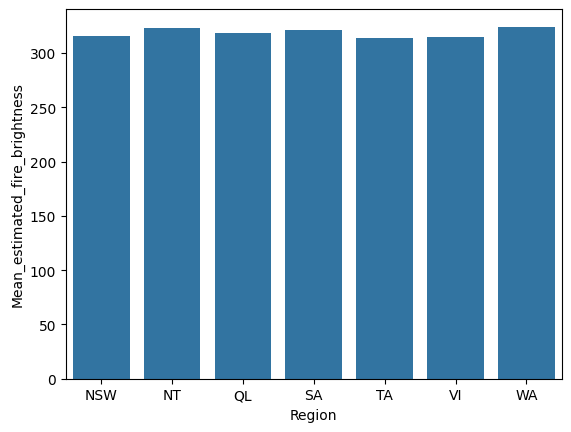

In [33]:
sns.barplot(data=df_q3, x='Region', y='Mean_estimated_fire_brightness')

In [36]:
df_q4 = df.groupby('Region')['Count'].sum()
df_q4

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ee84b698d0>,
 [Text(1.0793964706995622, 0.21190389104811078, ''),
  Text(0.12169519398833024, 1.0932475839260487, ''),
  Text(-1.095984530451195, -0.09390372203312225, ''),
  Text(-0.7355073522223394, -0.8179418896394071, ''),
  Text(-0.6704149209479746, -0.8720916429884655, ''),
  Text(-0.574779849111394, -0.9378849210086936, ''),
  Text(0.5785242935351861, -0.9355798425519942, '')])

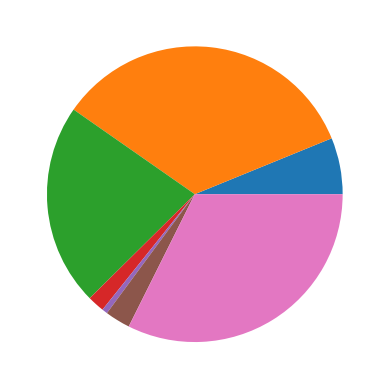

In [ ]:
plt.pie(df_q4, )

([<matplotlib.axis.XTick at 0x1ee84945dd0>,
 [Text(290.7, 0, '290.70'),
  Text(299.825, 0, '299.82'),
  Text(308.95, 0, '308.95'),
  Text(318.075, 0, '318.07'),
  Text(327.2, 0, '327.20'),
  Text(336.325, 0, '336.32'),
  Text(345.45, 0, '345.45'),
  Text(354.575, 0, '354.57'),
  Text(363.7, 0, '363.70'),
  Text(372.825, 0, '372.82'),
  Text(381.95, 0, '381.95')])

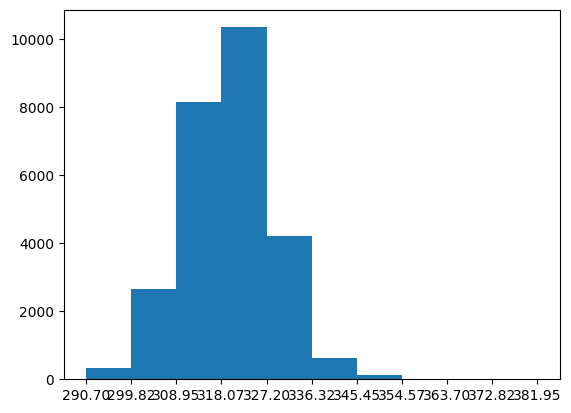

In [42]:
plt.hist(df['Mean_estimated_fire_brightness'])
plt.xticks(bin_edges)

In [40]:
count, bin_edges = np.histogram(df['Mean_estimated_fire_brightness'])

In [41]:
bin_edges

array([290.7  , 299.825, 308.95 , 318.075, 327.2  , 336.325, 345.45 ,
       354.575, 363.7  , 372.825, 381.95 ])

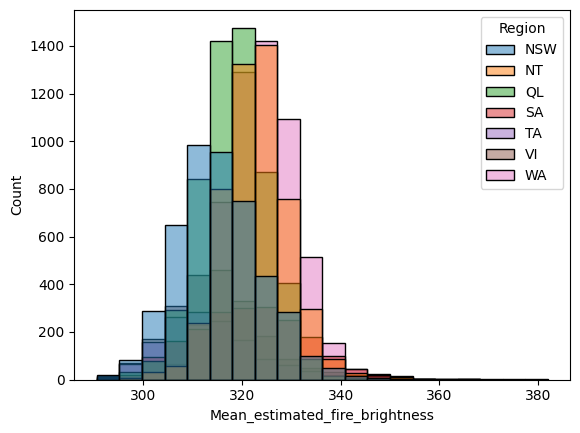

In [47]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', bins=20)

plt.show()

In [48]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [59]:
import folium.vector_layers


aus_map = folium.Map(location=[-25, 135], zoom_start=4)
for lat,lon,reg in zip(reg['Lat'],reg['Lon'],reg['region']):
    folium.vector_layers.CircleMarker(
       location=[lat,lon],
       radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=reg,
        fill_color='blue',
        fill_opacity=0.6 
    ).add_to(aus_map)
aus_map